In [9]:
#import important dependencies
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,accuracy_score

## load the dataset

In [38]:
df = pd.read_csv('spam.csv',  encoding='iso-8859-1')

In [39]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.isnull().sum()

target           0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [17]:
df.shape

(5572, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [40]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [41]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
#rename the column
df.rename(columns={"v1":"target","v2":"message"},inplace=True)

In [44]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

ham     4825
spam     747
Name: target, dtype: int64


<AxesSubplot: xlabel='target', ylabel='count'>

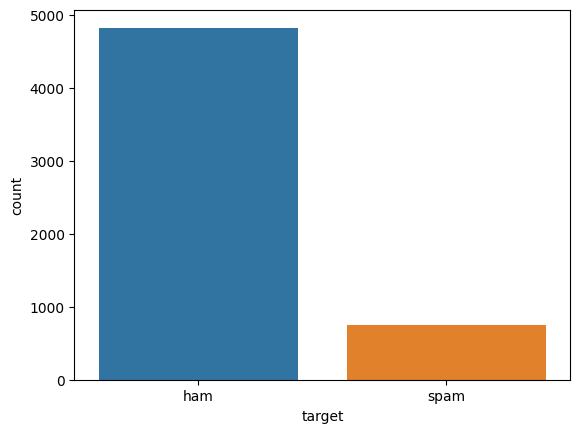

In [45]:
print(df["target"].value_counts())
sns.countplot(df,x=df["target"])

### encode the target dataset

In [46]:
#label encoding
df["target"]=df["target"].map({"ham":0,"spam":1})
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### split the dataset

In [47]:
#train test split the dataset

x=df["message"]
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=38)
print(x_train.shape,x_test.shape)

(4179,) (1393,)


In [48]:
#vectorizer

v=TfidfVectorizer()

x_train=v.fit_transform(x_train)
x_test=v.transform(x_test)

## build a model

In [49]:
#build the SVM model by linear kernel

svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
print("accuracy score of linear kernel SVC :",accuracy_score(y_test,svc.predict(x_test)))
print("auroc score of poly linear SVC:",roc_auc_score(y_test,svc.predict(x_test)))
print("classification report of linear kernel SVC:\n",classification_report(y_test,svc.predict(x_test)))

#confusion matrix
print("confusion matrix of linear kernel SVC:\n",confusion_matrix(y_test,svc.predict(x_test)))

accuracy score of linear kernel SVC : 0.990667623833453
auroc score of poly linear SVC: 0.9674998448044979
classification report of linear kernel SVC:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.99      0.94      0.96       187

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

confusion matrix of linear kernel SVC:
 [[1205    1]
 [  12  175]]


### hyper parameter tuning

In [51]:
# build the poly kernal model

svc_poly=SVC(kernel="poly")
svc_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [52]:
#evaluate the poly kernel svc model

print("accuracy score of poly kernel SVC :",accuracy_score(y_test,svc_poly.predict(x_test)))
print("auroc score of poly kernel SVC:",roc_auc_score(y_test,svc_poly.predict(x_test)))
print("classification report of poly kernel SVC:\n",classification_report(y_test,svc_poly.predict(x_test)))

#confusion matrix
print("confusion matrix of poly kernel SVC:\n",confusion_matrix(y_test,svc_poly.predict(x_test)))

accuracy score of poly kernel SVC : 0.9411342426417804
auroc score of poly kernel SVC: 0.7807486631016043
classification report of poly kernel SVC:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1206
           1       1.00      0.56      0.72       187

    accuracy                           0.94      1393
   macro avg       0.97      0.78      0.84      1393
weighted avg       0.94      0.94      0.93      1393

confusion matrix of poly kernel SVC:
 [[1206    0]
 [  82  105]]


In [53]:
#build the rbf kernel model

svc_rbf=SVC(kernel="rbf")
svc_rbf.fit(x_train,y_train)

SVC()

In [54]:
#evaluate the rbf kernel svc model

print("accuracy score of rbf kernel SVC :",accuracy_score(y_test,svc_rbf.predict(x_test)))
print("auroc score of rbf kernel SVC:",roc_auc_score(y_test,svc_rbf.predict(x_test)))
print("classification report of rbf kernel SVC:\n",classification_report(y_test,svc_rbf.predict(x_test)))

#confusion matrix
print("confusion matrix of rbf kernel SVC:\n",confusion_matrix(y_test,svc_rbf.predict(x_test)))

accuracy score of rbf kernel SVC : 0.9813352476669059
auroc score of rbf kernel SVC: 0.9304812834224598
classification report of rbf kernel SVC:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       1.00      0.86      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393

confusion matrix of rbf kernel SVC:
 [[1206    0]
 [  26  161]]


In [55]:
#build the sigmoid kernel  model

svc_sig=SVC(kernel='sigmoid')
svc_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [56]:
#evaluate the sigmoid kernel svc model

print("accuracy score of sigmoid kernel SVC :",accuracy_score(y_test,svc_sig.predict(x_test)))
print("auroc score of sigmoid kernel SVC:",roc_auc_score(y_test,svc_sig.predict(x_test)))
print("classification report of sigmoid kernel SVC:\n",classification_report(y_test,svc_sig.predict(x_test)))

#confusion matrix
print("confusion matrix of sigmoid kernel SVC:\n",confusion_matrix(y_test,svc_sig.predict(x_test)))

accuracy score of sigmoid kernel SVC : 0.9885139985642498
auroc score of sigmoid kernel SVC: 0.9617376575234347
classification report of sigmoid kernel SVC:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.99      0.93      0.96       187

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393

confusion matrix of sigmoid kernel SVC:
 [[1204    2]
 [  14  173]]


## creating the sk-learn pipeline

In [59]:
from sklearn.pipeline import Pipeline
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=38)

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('SVC',SVC(kernel='linear'))
])

In [60]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('SVC', SVC(kernel='linear'))])

In [61]:
print('auroc score is :',roc_auc_score(y_test,clf.predict(x_test)))
confusion_matrix(y_test,clf.predict(x_test))

auroc score is : 0.9674998448044979


array([[1205,    1],
       [  12,  175]], dtype=int64)

In [62]:
roc_auc_score(y_train,clf.predict(x_train))

0.9881165377176014

In [63]:
confusion_matrix(y_train,clf.predict(x_train))

array([[3617,    2],
       [  13,  547]], dtype=int64)

## Dumping to pickle file

In [64]:
import pickle
file_name="sms_classification"
pickle.dump(clf,open('sms_class_model.pkl','wb'))

In [65]:
clf.predict(['hi,how are you?'])[0]

0